Задача 1. Построение базовой нейронной сети для классификации
изображений
1. Используйте библиотеку TensorFlow или PyTorch.
2. Загрузите датасет MNIST (или CIFAR-10).
3. Постройте простую полносвязную нейронную сеть для классификации
изображений.
4. Обучите сеть на тренировочных данных и оцените её точность на
тестовых данных.
5. Визуализируйте примеры предсказаний сети, включая правильно и
неправильно классифицированные изображения.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Загрузите датасет MNIST (или CIFAR-10).

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация (приведение значений к диапазону [0, 1])
x_train, x_test = x_train / 255.0, x_test / 255.0

Построение простой полносвязной нейронной сети для классификации
изображений.

In [3]:
#Построение простой полносвязной нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Преобразуем 2D изображение в вектор
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 классов для цифр от 0 до 9
])

#Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Обучение сетм на тренировочных данных и оценка её точности на
тестовых данных.

In [4]:
# Обучение модели
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

#  Оценка точности на тестовой выборке
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {test_acc:.4f}')

#  Получение предсказаний
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)


Epoch 1/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2803 - accuracy: 0.9194 - val_loss: 0.1181 - val_accuracy: 0.9657
Epoch 2/5
1688/1688 [==============================] - 2s 962us/step - loss: 0.1238 - accuracy: 0.9633 - val_loss: 0.0995 - val_accuracy: 0.9712
Epoch 3/5
1688/1688 [==============================] - 2s 922us/step - loss: 0.0839 - accuracy: 0.9748 - val_loss: 0.0781 - val_accuracy: 0.9765
Epoch 4/5
1688/1688 [==============================] - 2s 915us/step - loss: 0.0626 - accuracy: 0.9809 - val_loss: 0.0818 - val_accuracy: 0.9767
Epoch 5/5
313/313 [==============================] - 0s 642us/step - loss: 0.0787 - accuracy: 0.9759

Test Accuracy: 0.9759


Визуализация результатов


 Правильно классифицированные изображения:


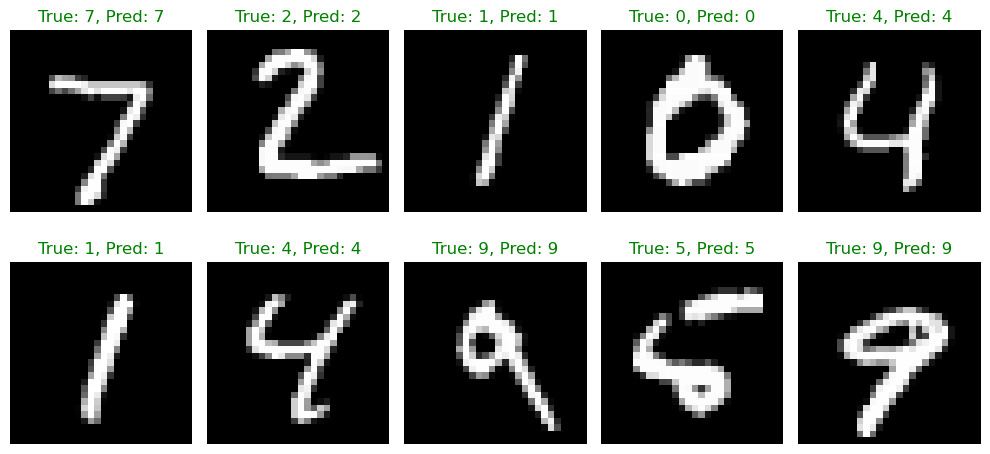

 Неправильно классифицированные изображения:


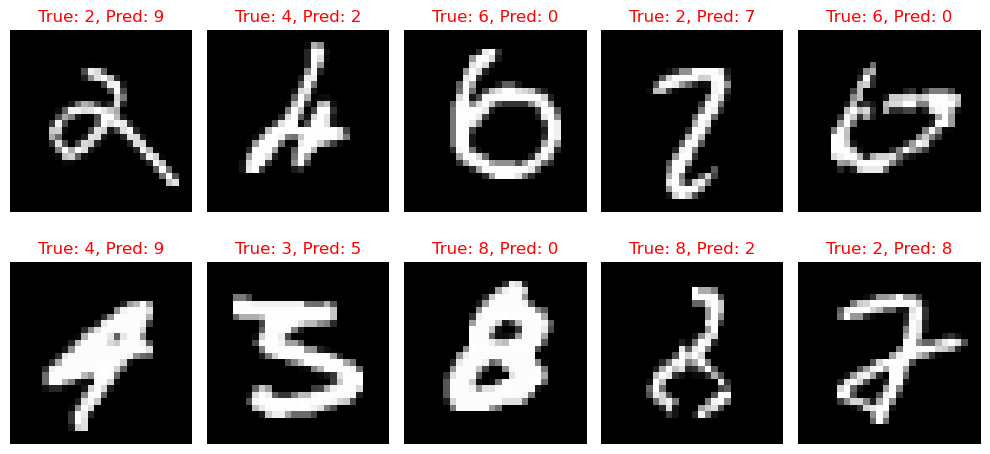

In [5]:
#Визуализация: правильно и неправильно классифицированные изображения
def plot_images(images, labels, preds, correct=True, max_images=10):
    filtered = [(img, lbl, pred) for img, lbl, pred in zip(images, labels, preds)
                if (lbl == pred) == correct]
    plt.figure(figsize=(10, 5))
    for i, (img, lbl, pred) in enumerate(filtered[:max_images]):
        plt.subplot(2, max_images//2, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {lbl}, Pred: {pred}", color='green' if lbl == pred else 'red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\n Правильно классифицированные изображения:")
plot_images(x_test, y_test, predicted_labels, correct=True)

print(" Неправильно классифицированные изображения:")
plot_images(x_test, y_test, predicted_labels, correct=False)
